# Loading Data & Visualizations
goals
* Get Data
* Inspect Data
* The .pipe method

### Loading Data

In [1]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')

[*********************100%%**********************]  2 of 2 completed


In [3]:
raw

Price       Adj Close                  Close                   High  \
Ticker           AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2010-01-04   6.461977   86.860085   7.643214  113.330002   7.660714   
2010-01-05   6.473150   87.089996   7.656429  113.629997   7.699643   
2010-01-06   6.370185   87.151306   7.534643  113.709999   7.686786   
2010-01-07   6.358407   87.519203   7.520714  114.190002   7.571429   
2010-01-08   6.400680   87.810432   7.570714  114.570000   7.571429   
...               ...         ...        ...         ...        ...   
2019-12-23  68.988747  300.696808  71.000000  321.220001  71.062500   
2019-12-24  69.054329  300.706024  71.067497  321.230011  71.222504   
2019-12-26  70.424385  302.306854  72.477501  322.940002  72.495003   
2019-12-27  70.397682  302.231934  72.449997  322.859985  73.492500   
2019-12-30  70.815491  300.565643  72.879997  321.079987  73.172501   

Price                         Low                   Open              \
Ticker             SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2010-01-04  113.389999   7.585000  111.510002   7.622500  112.370003   
2010-01-05  113.680000   7.616071  112.849998   7.664286  113.260002   
2010-01-06  113.989998   7.526786  113.430000   7.656429  113.519997   
2010-01-07  114.330002   7.466071  113.180000   7.562500  113.500000   
2010-01-08  114.620003   7.466429  113.660004   7.510714  113.889999   
...                ...        ...         ...        ...         ...   
2019-12-23  321.649994  70.092499  321.059998  70.132500  321.589996   
2019-12-24  321.519989  70.730003  320.899994  71.172501  321.470001   
2019-12-26  322.950012  71.175003  321.640015  71.205002  321.649994   
2019-12-27  323.799988  72.029999  322.279999  72.779999  323.739990   
2019-12-30  323.100006  71.305000  320.549988  72.364998  322.950012   

Price          Volume             
Ticker           AAPL        SPY  
Date                              
2010-01-04  493729600  118944600  
2010-01-05  601904800  111579900  
2010-01-06  552160000  116074400  
2010-01-07  477131200  131091100  
2010-01-08  447610800  126402800  
...               ...        ...  
2019-12-23   98572000   52990000  
2019-12-24   48478800   20270000  
2019-12-26   93121200   30911200  
2019-12-27  146266000   42528800  
2019-12-30  144114400   49729100  

[2515 rows x 12 columns]

In [4]:
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [5]:
# Going to use the .pipe method a lot
raw.pipe?

In [6]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.461977,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.473150,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.370185,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.358407,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.400680,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,68.988747,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.054329,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.424385,72.477501,72.495003,71.175003,71.205002,93121200


In [7]:
import yfinance as yf

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')
    
    return (raw
           .iloc[:, ::2]
           .pipe(fix_cols)
           )

tweak_data()

[*********************100%%**********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.461977,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.473150,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.370185,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.358407,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.400680,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,68.988747,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.054329,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.424385,72.477501,72.495003,71.175003,71.205002,93121200


## Line Plot
Goals
* Line plots
* Matplotlib plots

In [8]:
(raw
 .iloc[:, :-2:2]
 .pipe(fix_cols)
)

,Adj Close,Close,High,Low,Open
Date,,,,,
2010-01-04,6.461977,7.643214,7.660714,7.585000,7.622500
2010-01-05,6.473150,7.656429,7.699643,7.616071,7.664286
2010-01-06,6.370185,7.534643,7.686786,7.526786,7.656429
2010-01-07,6.358407,7.520714,7.571429,7.466071,7.562500
2010-01-08,6.400680,7.570714,7.571429,7.466429,7.510714
...,...,...,...,...,...
2019-12-23,68.988747,71.000000,71.062500,70.092499,70.132500
2019-12-24,69.054329,71.067497,71.222504,70.730003,71.172501
2019-12-26,70.424385,72.477501,72.495003,71.175003,71.205002


<Axes: xlabel='Date'>

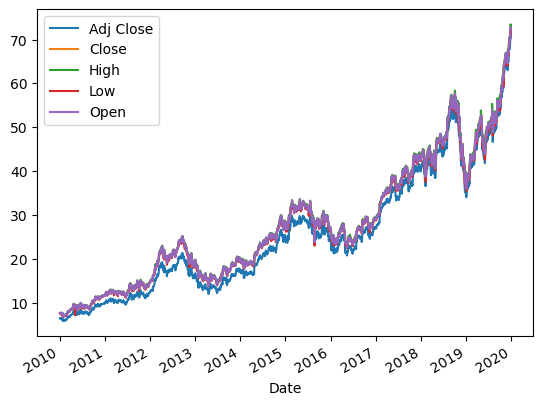

In [9]:
(raw
 .iloc[:, :-2:2]
 .pipe(fix_cols)
 .plot()
)

<Axes: xlabel='Date'>

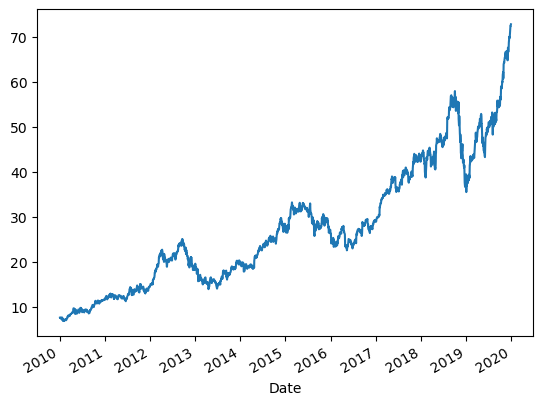

In [10]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Close
 .plot()
)

<Axes: xlabel='Date'>

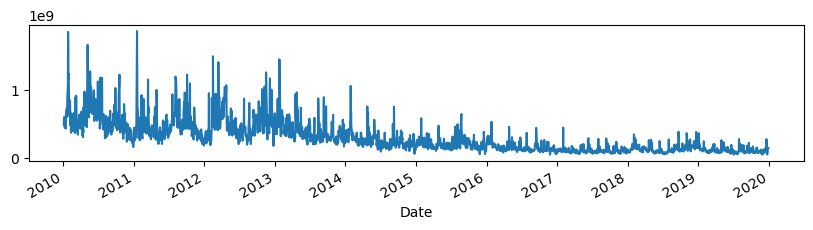

In [11]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Volume
 .plot(figsize=(10, 2))
)

# Resampling

<Axes: xlabel='Date'>

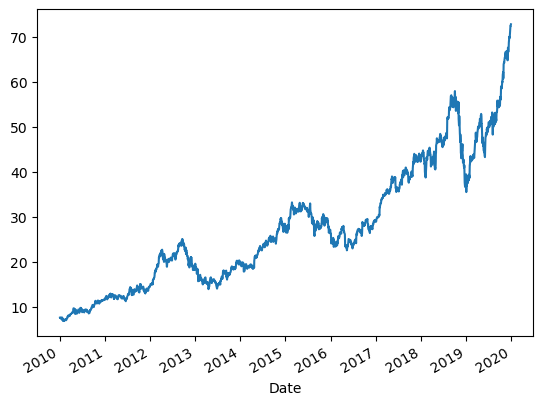

In [12]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Close
 .plot()
)

In [13]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Close
)

Date
2010-01-04     7.643214
2010-01-05     7.656429
2010-01-06     7.534643
2010-01-07     7.520714
2010-01-08     7.570714
                ...    
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
Name: Close, Length: 2515, dtype: float64

In [14]:
# use resample to change granularity

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('M') # offset alias, how we want to aggregatet this!
 .Close
)

In [15]:
# Every index entry (date), is the last day of the month with the offset alias of "M"
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('M') # offset alias
 .Close
 .mean()
)

Date
2010-01-31     7.418402
2010-02-28     7.099850
2010-03-31     7.978960
2010-04-30     8.969592
2010-05-31     8.980768
                ...    
2019-08-31    51.239432
2019-09-30    54.498750
2019-10-31    58.821630
2019-11-30    65.630126
2019-12-31    68.917374
Freq: M, Name: Close, Length: 120, dtype: float64

In [16]:
raw.resample??

<Axes: xlabel='Date'>

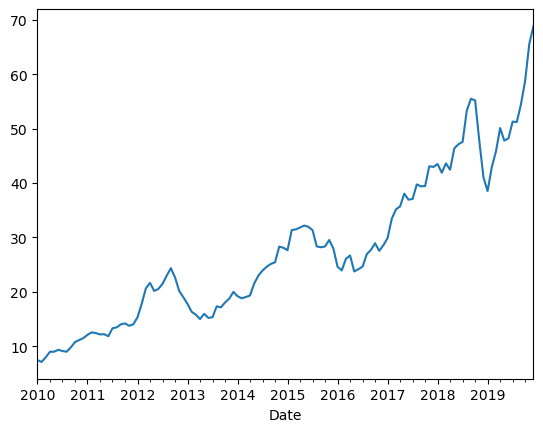

In [17]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('M') # offset alias
 .Close
 .mean()
 .plot()
)

# Candlestick Plot

,Open,High,Low,Close
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,42.540001,43.075001,42.314999,43.064999
2018-01-03,43.132500,43.637501,42.990002,43.057499
2018-01-04,43.134998,43.367500,43.020000,43.257500
2018-01-05,43.360001,43.842499,43.262501,43.750000
...,...,...,...,...
2018-06-26,45.747501,46.632500,45.634998,46.107498
2018-06-27,46.307499,46.820000,46.007500,46.040001
2018-06-28,46.025002,46.552502,45.950001,46.375000


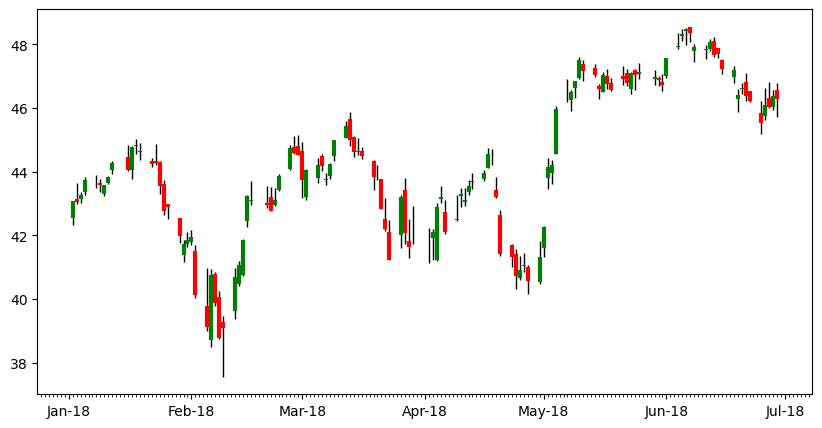

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
def plot_candle(df, ax):
    # wick 
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors='k', linewidth=1)
    # red - decrease
    red = df.query('Open > Close')
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=3)
    # green - increase
    green = df.query('Open <= Close')
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors='g', linewidth=3)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return df

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('d')
 .agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
 .loc['jan 2018': 'jun 2018']
 .pipe(plot_candle, ax)
)    

# Challenge
Plot the Candles for the time period of Sep 2019 to Dec 2019.

,Open,High,Low,Close
Date,,,,
2018-09-01,NaN,NaN,NaN,NaN
2018-09-02,NaN,NaN,NaN,NaN
2018-09-03,NaN,NaN,NaN,NaN
2018-09-04,57.102501,57.294998,56.657501,57.090000
2018-09-05,57.247501,57.417500,56.275002,56.717499
...,...,...,...,...
2018-12-27,38.959999,39.192501,37.517502,39.037498
2018-12-28,39.375000,39.630001,38.637501,39.057499
2018-12-29,NaN,NaN,NaN,NaN


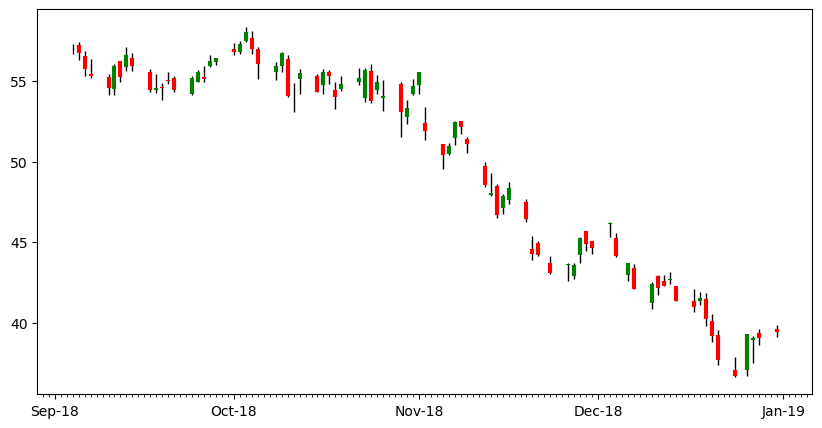

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('d')
 .agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
 .loc['sep 2018': 'dec 2018']
 .pipe(plot_candle, ax)
)    

# Calculations
Goal

* Explore Pandas methods like <code>.pct_change</code>
* Plotting with Pandas
* Refactoring to functions

## Returns

In [20]:
aapl = (raw
        .iloc[:, ::2]
       .pipe(fix_cols))
aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.461977,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.473150,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.370185,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.358407,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.400680,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,68.988747,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.054329,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.424385,72.477501,72.495003,71.175003,71.205002,93121200


In [21]:
# Returns
aapl.pct_change()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098
2010-01-06,-0.015906,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646
2010-01-07,-0.001849,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882
2010-01-08,0.006648,0.006648,0.000000,0.000048,-0.006848,-0.061871
...,...,...,...,...,...,...
2019-12-23,0.016318,0.016318,0.005661,0.006498,-0.006023,-0.642827
2019-12-24,0.000951,0.000951,0.002252,0.009095,0.014829,-0.508189
2019-12-26,0.019840,0.019840,0.017867,0.006292,0.000457,0.920864


In [22]:
aapl.pct_change?

## Plotting Returns

<Axes: xlabel='Date'>

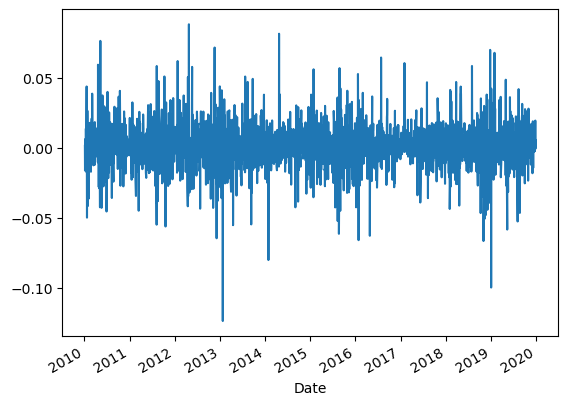

In [23]:
# Plot Returns
(aapl
 .pct_change()
 .Close
 .plot()
)

<Axes: >

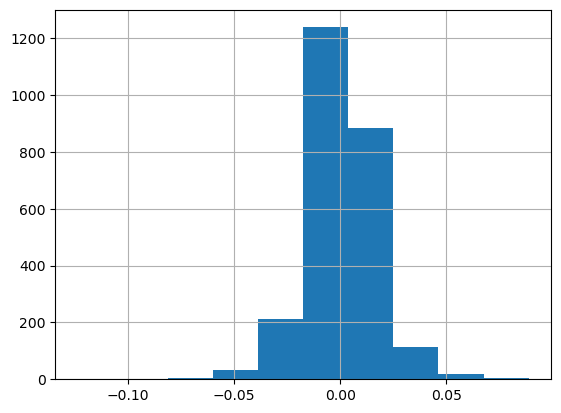

In [24]:
# Histogram of Returns
(aapl
 .pct_change()
 .Close
 .hist()
)

<Axes: >

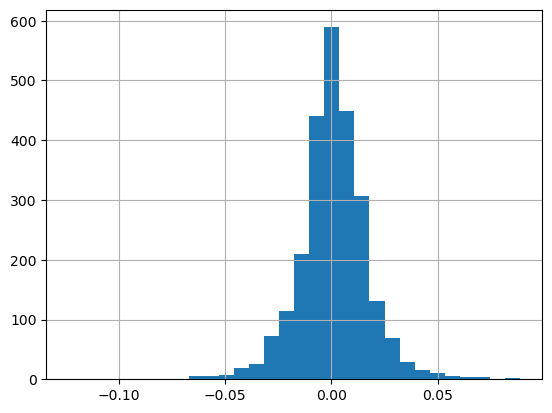

In [25]:
# Change bins
(aapl
 .pct_change()
 .Close
 .hist(bins=30)
)

<Axes: xlabel='Date'>

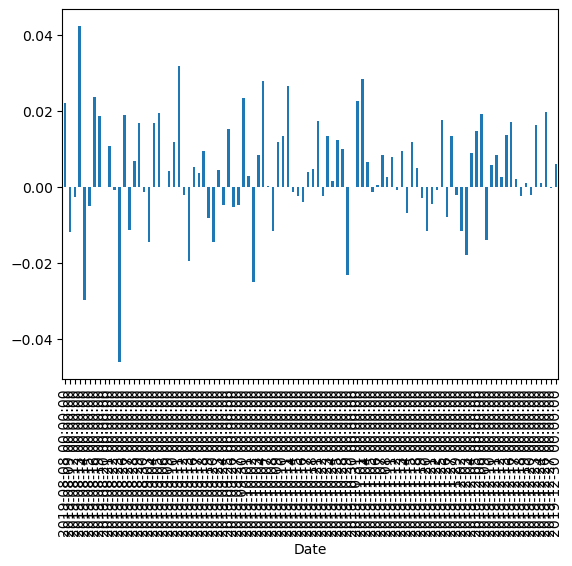

In [26]:
# Understanding plotting in Pandas is a huge lever
# Bar Plot returns
(aapl
 .pct_change()
 .Close
 .iloc[-100:]
 .plot.bar()
)

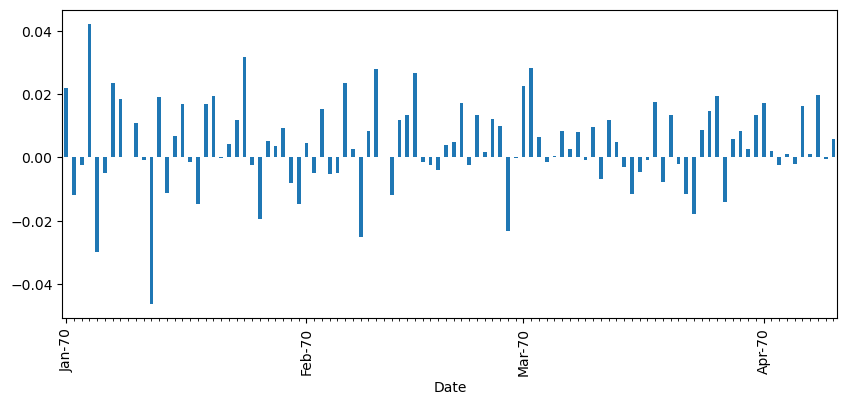

In [27]:
# Bar Plot of Returns
# Sadly dates are broken with Pandas bar plots
# 1970s?
fig, ax = plt.subplots(figsize=(10, 4))
(aapl
 .pct_change()
 .Close
 .iloc[-100:]
 .plot.bar(ax=ax)
)
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator())

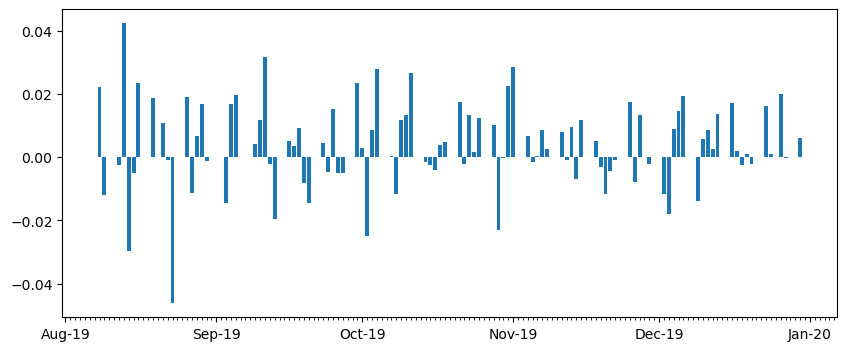

In [28]:
# Returns - using matplotlib
def my_bar(ser, ax):  #passes in Series and Axis
    ax.bar(ser.index, ser) # ax.bar will use matplot lib to plot
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fig, ax = plt.subplots(figsize=(10, 4))    
_ = (aapl
 .pct_change()
 .Close
 .iloc[-100:]
 .pipe(my_bar, ax)
)

# Cumulative Returns
Goal:

* More complicated Pandas
* Refactoring into a function
* Explore source
* Creating new columns with <code>.assign</code>
* Illustrate <code>lambda</code>

*Cumulative Returns* is the amount that investment has gained or lost over time:

(current_price-original_price) / original_price

<Axes: xlabel='Date'>

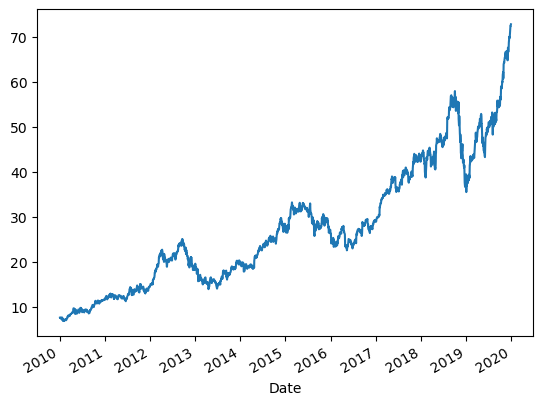

In [29]:
(aapl
 .Close
 .plot()
)

In [36]:
(aapl
 .Close
 .sub(aapl.Close[0])
 .div(aapl.Close[0])
 #.plot()
)

C:\Users\JohnZea\AppData\Local\Temp\ipykernel_26256\1869878980.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .sub(aapl.Close[0])
C:\Users\JohnZea\AppData\Local\Temp\ipykernel_26256\1869878980.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .div(aapl.Close[0])


Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-23    8.289286
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
Name: Close, Length: 2515, dtype: float64

In [35]:
# alternate calculation
(aapl
 .Close
 .pct_change()
 .add(1)
 .cumprod()
 .sub(1)
 #.plot()
)

Date
2010-01-04         NaN
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-23    8.289286
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
Name: Close, Length: 2515, dtype: float64

In [38]:
aapl.cumprod??

In [39]:
np.cumprod??

In [41]:
# turning off warnings for now!
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Date'>

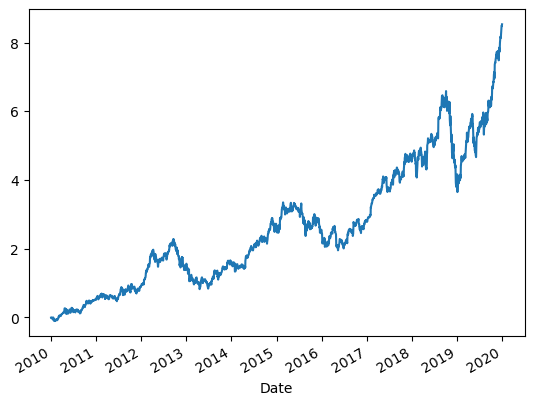

In [42]:
# create a function for calulating
def calc_cum_returns(df, col):
    ser = df[col]
    return (ser
            .sub(ser[0])
            .div(ser[0])
           )

(aapl
 .pipe(calc_cum_returns, 'Close')
 .plot()
)

In [43]:
# Lambda is an *anonymous function*

def get_returns(df):
    return calc_cum_returns(df, 'Close')

get_returns(aapl)

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-23    8.289286
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
Name: Close, Length: 2515, dtype: float64

In [44]:
# Lambda is an *anonymous function*

(lambda df: get_returns(df))(aapl)

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-23    8.289286
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
Name: Close, Length: 2515, dtype: float64

In [45]:
# Create a new column
(aapl
 .assign(cum_returns=lambda df:calc_cum_returns(df, 'Close'))
)

,Adj Close,Close,High,Low,Open,Volume,cum_returns
Date,,,,,,,
2010-01-04,6.461977,7.643214,7.660714,7.585000,7.622500,493729600,0.000000
2010-01-05,6.473150,7.656429,7.699643,7.616071,7.664286,601904800,0.001729
2010-01-06,6.370185,7.534643,7.686786,7.526786,7.656429,552160000,-0.014205
2010-01-07,6.358407,7.520714,7.571429,7.466071,7.562500,477131200,-0.016027
2010-01-08,6.400680,7.570714,7.571429,7.466429,7.510714,447610800,-0.009486
...,...,...,...,...,...,...,...
2019-12-23,68.988747,71.000000,71.062500,70.092499,70.132500,98572000,8.289286
2019-12-24,69.054329,71.067497,71.222504,70.730003,71.172501,48478800,8.298117
2019-12-26,70.424385,72.477501,72.495003,71.175003,71.205002,93121200,8.482594


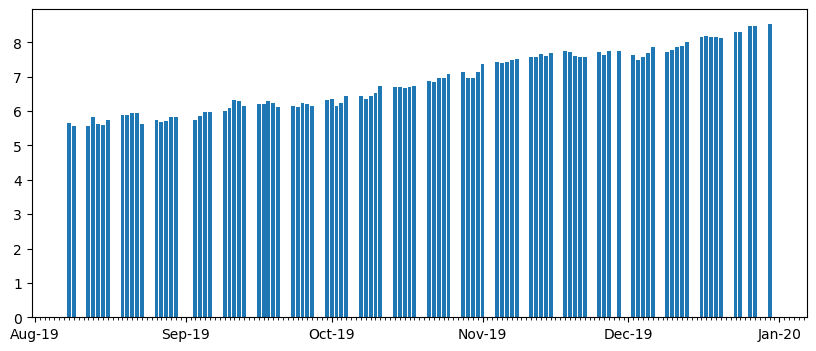

In [47]:
# Returns - using matplotlib
def my_bar(ser, ax):  #passes in Series and Axis
    ax.bar(ser.index, ser) # ax.bar will use matplot lib to plot
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

# Again, using pipe to chain, as defined by Pandas documentation:
# Apply chainable functions that expect Series or DataFrames.
fig, ax = plt.subplots(figsize=(10, 4))    
_ = (aapl
 #.pct_change()
 #.Close
 .pipe(calc_cum_returns, 'Close')
 .iloc[-100:]
 .pipe(my_bar, ax)
)

# Volatility
Goals

* More complicated Pandas
* Learn about rolling operations

In [48]:
(aapl
 .Close
 .mean()
)

27.568102107796943

In [49]:
(aapl
 .Close
 .std()
)

14.016253049378737

In [54]:
# this is an indication of volatility
# standard deviation, measure of how much things change or vary, this is a meausre of variance
(aapl
 .assign(pct_change_close=aapl.Close.pct_change())
 .pct_change_close 
 .std()
)

0.01623613318144792

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

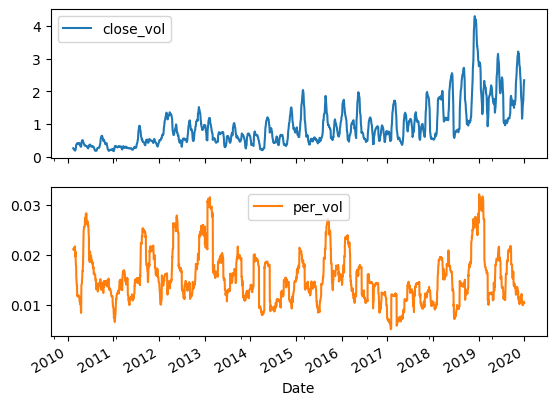

In [58]:
(aapl
 .assign(close_vol=aapl.rolling(30).Close.std(), 
         per_vol=aapl.Close.pct_change().rolling(30).std()) # percent change, standard deviation
 .iloc[:, -2:]
 #.iloc[28:]
 .plot(subplots=True)
)

In [59]:
# 15 day volatility
(aapl
 .assign(pct_change_close=aapl.Close.pct_change())
 .resample('15D')
 .std()
)

,Adj Close,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,,
2010-01-04,0.077746,0.091958,0.072060,0.101749,0.080372,7.028347e+07,0.010383
2010-01-19,0.225855,0.267141,0.253188,0.232856,0.234097,4.361002e+08,0.030046
2010-02-03,0.112605,0.133188,0.102614,0.124059,0.123349,1.455474e+08,0.017088
2010-02-18,0.136377,0.161306,0.138608,0.166270,0.157960,9.844200e+07,0.011254
2010-03-05,0.073981,0.087505,0.088090,0.113449,0.129484,1.951401e+08,0.014002
...,...,...,...,...,...,...,...
2019-10-29,1.736715,1.725581,1.449098,2.018594,1.418779,2.960150e+07,0.013412
2019-11-13,0.512826,0.527773,0.404718,0.436709,0.509585,1.787058e+07,0.009868
2019-11-28,0.970560,0.998849,1.019784,0.918851,0.936544,2.826525e+07,0.012526


In [60]:
# 15 day rolling volatility
(aapl
 .assign(pct_change_close=aapl.Close.pct_change())
 .rolling(window=15, min_periods=15)
 .std()
)

,Adj Close,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-12-23,1.835248,1.888754,1.932242,1.953716,1.906586,4.891036e+07,0.010997
2019-12-24,1.724593,1.774875,1.762143,1.842910,1.836871,5.206250e+07,0.009136
2019-12-26,1.746211,1.797126,1.757091,1.821097,1.758186,5.084715e+07,0.009786


<Axes: xlabel='Date'>

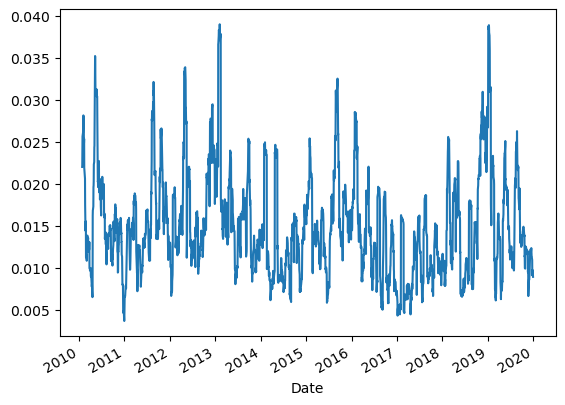

In [66]:
# 15 day volatility
# note if column name conflicts with method need to use
# index access ([])
(aapl
 .assign(pct_change=aapl.Close.pct_change())
 .rolling(window=15, min_periods=15)
 .std()
 #.pct_change
 ['pct_change']
 .plot()
)

# Challenge
Plot the rolling volatility over 30-day sliding windows for 2015-219

<Axes: xlabel='Date'>

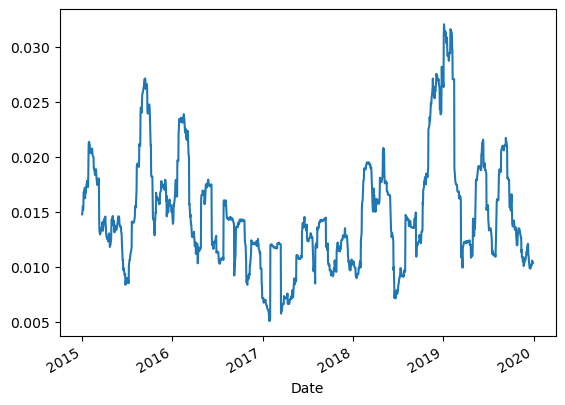

In [79]:
(aapl
 .assign(pct_change=aapl.Close.pct_change())
 .rolling(window=30, min_periods=30) # making the size the same size as the window
 ['pct_change']
 .std()
 .loc['2015': '2019'] 
 .plot()
)

# Rollling Windows

## Simple Moving Average
Goals:

* Build intuition for rolling
* Illustrate <code>lambda</code>
* Slicing


In [81]:
(aapl
 .assign(s1=aapl.Close.shift(1),
         s2=aapl.Close.shift(2),
         ma3=lambda df_:df_.loc[:, ['Close', 's1', 's2']].mean(axis='columns'), 
         ma3_builtin=aapl.Close.rolling(3).mean()
        ) 
)

,Adj Close,Close,High,Low,Open,Volume,s1,s2,ma3,ma3_builtin
Date,,,,,,,,,,
2010-01-04,6.461977,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,7.643214,NaN
2010-01-05,6.473150,7.656429,7.699643,7.616071,7.664286,601904800,7.643214,NaN,7.649822,NaN
2010-01-06,6.370185,7.534643,7.686786,7.526786,7.656429,552160000,7.656429,7.643214,7.611429,7.611429
2010-01-07,6.358407,7.520714,7.571429,7.466071,7.562500,477131200,7.534643,7.656429,7.570595,7.570595
2010-01-08,6.400680,7.570714,7.571429,7.466429,7.510714,447610800,7.520714,7.534643,7.542024,7.542024
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,68.988747,71.000000,71.062500,70.092499,70.132500,98572000,69.860001,70.004997,70.288333,70.288333
2019-12-24,69.054329,71.067497,71.222504,70.730003,71.172501,48478800,71.000000,69.860001,70.642499,70.642499
2019-12-26,70.424385,72.477501,72.495003,71.175003,71.205002,93121200,71.067497,71.000000,71.514999,71.514999


# Moving Averages Plotting

In [82]:
(aapl
 .assign(s1=aapl.Close.shift(1),
         s2=aapl.Close.shift(2),
         ma3=lambda df_:df_.loc[:, ['Close', 's1', 's2']].mean(axis='columns'), 
         ma3_builtin=aapl.Close.rolling(3).mean()
        ) 
)

,Adj Close,Close,High,Low,Open,Volume,s1,s2,ma3,ma3_builtin
Date,,,,,,,,,,
2010-01-04,6.461977,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,7.643214,NaN
2010-01-05,6.473150,7.656429,7.699643,7.616071,7.664286,601904800,7.643214,NaN,7.649822,NaN
2010-01-06,6.370185,7.534643,7.686786,7.526786,7.656429,552160000,7.656429,7.643214,7.611429,7.611429
2010-01-07,6.358407,7.520714,7.571429,7.466071,7.562500,477131200,7.534643,7.656429,7.570595,7.570595
2010-01-08,6.400680,7.570714,7.571429,7.466429,7.510714,447610800,7.520714,7.534643,7.542024,7.542024
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,68.988747,71.000000,71.062500,70.092499,70.132500,98572000,69.860001,70.004997,70.288333,70.288333
2019-12-24,69.054329,71.067497,71.222504,70.730003,71.172501,48478800,71.000000,69.860001,70.642499,70.642499
2019-12-26,70.424385,72.477501,72.495003,71.175003,71.205002,93121200,71.067497,71.000000,71.514999,71.514999


<Axes: xlabel='Date'>

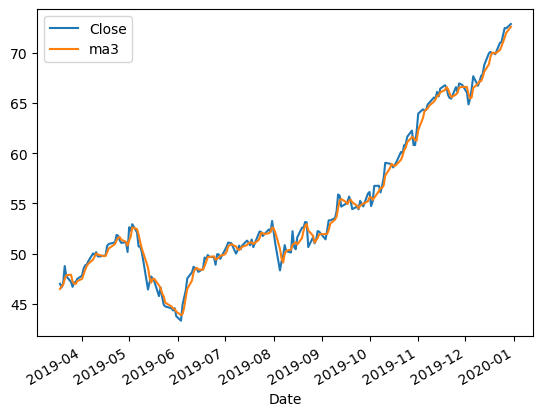

In [83]:
(aapl
 .assign(s1=aapl.Close.shift(1),
         s2=aapl.Close.shift(2),
         ma3=lambda df_:df_.loc[:, ['Close', 's1', 's2']].mean(axis='columns'), 
         ma3_builtin=aapl.Close.rolling(3).mean()
        ) 
 [['Close', 'ma3']]
 .iloc[-200:]
 .plot()
)

# using a moving average helps to smooth out the graph line

<Axes: xlabel='Date'>

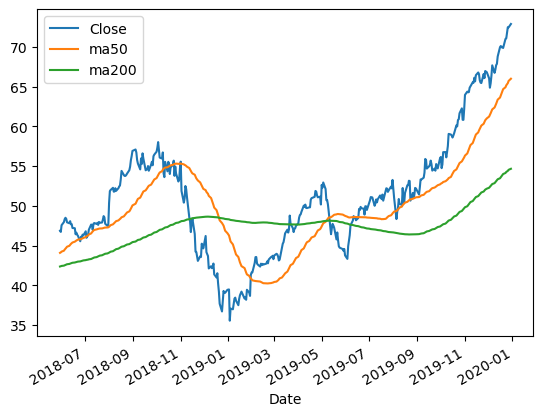

In [88]:
(aapl
 .assign(
         ma50=aapl.Close.rolling(50).mean(), 
         ma200=aapl.Close.rolling(200).mean()
        ) 
 [['Close', 'ma50', 'ma200']]
 .iloc[-400:]
 .plot()
)
# demonstrates the golden cross!

# Challenge
Create a plot with three lines:

* AAPL close price in 2015
* Exponential moving average with <code>alpha=.0392</code>
* Exponential moving average with <code>alpha=.00995</code>

Hint:

* Use the <code>.ewm</code> method to create a rolling aggregator

<Axes: xlabel='Date'>

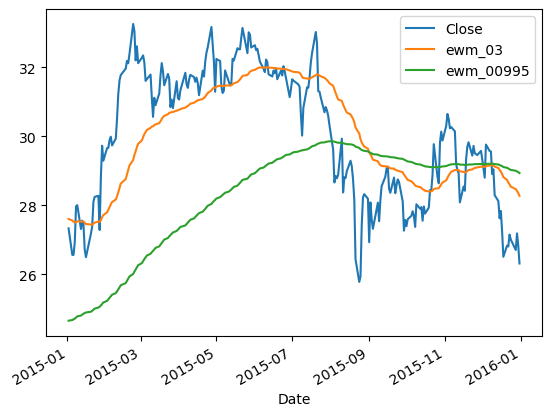

In [102]:
# note, if you do filtering of df before doing the calcs, your exponential moving average would be different
(aapl
 .assign(
         ewm_03=aapl.Close.ewm(alpha=.0392).mean(), 
         ewm_00995=aapl.Close.ewm(alpha=.00995).mean()
        ) 
 .loc['2015':'2015', ['Close', 'ewm_03', 'ewm_00995']]
 .plot()
)

In [93]:
aapl.ewm?

# Technical Analysis
Goals:
* Show if/else in Pandas
* Refactoring to functions

## On-balance Volume (OBV)
Indicator of momentum using volume
OBV = OBV prev = {

volume, if close > close prev

0, if close = close prev

-volume, if close < close prev

where:

OBV=Current on-balance volume level

OBV prev = Previous on-balance volume level

volume=Latest trading volume amount


In [104]:
aapl.Close

Date
2010-01-04     7.643214
2010-01-05     7.656429
2010-01-06     7.534643
2010-01-07     7.520714
2010-01-08     7.570714
                ...    
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
Name: Close, Length: 2515, dtype: float64

In [105]:
aapl.Close.shift(1)

Date
2010-01-04          NaN
2010-01-05     7.643214
2010-01-06     7.656429
2010-01-07     7.534643
2010-01-08     7.520714
                ...    
2019-12-23    69.860001
2019-12-24    71.000000
2019-12-26    71.067497
2019-12-27    72.477501
2019-12-30    72.449997
Name: Close, Length: 2515, dtype: float64

In [106]:
# naive ... this is using pure python code to do this...not best practice

def calc_obv(df):
    df = df.copy()
    df["OBV"] = 0.0 
    
    # Loop through the data and calculate OBV
    for i in range(1, len(df)):
        if df["Close"][i] > df["Close"][i - 1]:
            df["OBV"][i] = df["OBV"][i - 1] + df["Volume"][i]
        elif df["Close"][i] < df["Close"][i - 1]:
            df["OBV"][i] = df["OBV"][i - 1] - df["Volume"][i]
        else:
            df["OBV"][i] = df["OBV"][i - 1]
    return df

calc_obv(aapl)        

,Adj Close,Close,High,Low,Open,Volume,OBV
Date,,,,,,,
2010-01-04,6.461977,7.643214,7.660714,7.585000,7.622500,493729600,0.000000e+00
2010-01-05,6.473150,7.656429,7.699643,7.616071,7.664286,601904800,6.019048e+08
2010-01-06,6.370185,7.534643,7.686786,7.526786,7.656429,552160000,4.974480e+07
2010-01-07,6.358407,7.520714,7.571429,7.466071,7.562500,477131200,-4.273864e+08
2010-01-08,6.400680,7.570714,7.571429,7.466429,7.510714,447610800,2.022440e+07
...,...,...,...,...,...,...,...
2019-12-23,68.988747,71.000000,71.062500,70.092499,70.132500,98572000,1.416509e+10
2019-12-24,69.054329,71.067497,71.222504,70.730003,71.172501,48478800,1.421357e+10
2019-12-26,70.424385,72.477501,72.495003,71.175003,71.205002,93121200,1.430669e+10


In [107]:
%%timeit
calc_obv(aapl)      

621 ms ± 7.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [108]:
aapl.Volume.where?

In [110]:
%%timeit
# This is painful
(aapl
 .assign(close_prev=aapl.Close.shift(1), 
         vol=0,
         obv=lambda adf: adf.vol.where(cond=adf.Close == adf.close_prev, 
                                       other=adf.Volume.where(cond=adf.Close > adf.close_prev,
                                                 other=-adf.Volume.where(cond=adf.Close < adf.close_prev, other=0)
                                      )).cumsum()
            )
)

1.19 ms ± 2.41 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [111]:
pd.Series(np.select(condlist=[aapl.Close < 7.6, aapl.Close > 72],
                   choicelist=[7.55, 72], default=33))

0       33.00
1       33.00
2        7.55
3        7.55
4        7.55
        ...  
2510    33.00
2511    33.00
2512    72.00
2513    72.00
2514    72.00
Length: 2515, dtype: float64

In [112]:
aapl.Close

Date
2010-01-04     7.643214
2010-01-05     7.656429
2010-01-06     7.534643
2010-01-07     7.520714
2010-01-08     7.570714
                ...    
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
Name: Close, Length: 2515, dtype: float64

In [117]:
# This is why lambdas are so useful
# they give us access to new columns
(aapl
 .assign(prev_close=aapl.Close.shift(1),
        vol=np.select([aapl.Close > aapl.prev_close,
                      aapl.Close == aapl.prev_close,
                      aapl.Close < aapl.prev_close],
                     [aapl.Volume, 0, -aapl.Volume]),
         obv=lambda df_:df_.vol.cumsum(),
        )
)

AttributeError: 'DataFrame' object has no attribute 'prev_close'

In [118]:
np.select??

In [119]:
(aapl
 .assign(vol=np.select([aapl.Close > aapl.Close.shift(1),
                      aapl.Close == aapl.Close.shift(1),
                      aapl.Close < aapl.Close.shift(1)],
                     [aapl.Volume, 0, -aapl.Volume]),
         obv=lambda df_:df_.vol.cumsum(),
        )
)

,Adj Close,Close,High,Low,Open,Volume,vol,obv
Date,,,,,,,,
2010-01-04,6.461977,7.643214,7.660714,7.585000,7.622500,493729600,0,0
2010-01-05,6.473150,7.656429,7.699643,7.616071,7.664286,601904800,601904800,601904800
2010-01-06,6.370185,7.534643,7.686786,7.526786,7.656429,552160000,-552160000,49744800
2010-01-07,6.358407,7.520714,7.571429,7.466071,7.562500,477131200,-477131200,-427386400
2010-01-08,6.400680,7.570714,7.571429,7.466429,7.510714,447610800,447610800,20224400
...,...,...,...,...,...,...,...,...
2019-12-23,68.988747,71.000000,71.062500,70.092499,70.132500,98572000,98572000,14165094000
2019-12-24,69.054329,71.067497,71.222504,70.730003,71.172501,48478800,48478800,14213572800
2019-12-26,70.424385,72.477501,72.495003,71.175003,71.205002,93121200,93121200,14306694000


In [120]:
# A way to refactor all of the above logic, once the calculation logic has been defined
def calc_obv(df, close_col='Close', vol_col='Volume'):
    close = df[close_col]
    vol = df[vol_col]
    close_shift = close.shift(1)
    return (df
            .assign(vol=np.select([close > close_shift,
                                   close == close_shift,
                                   close < close_shift],
                                  [vol, 0, -vol]),
                    obv=lambda df_:df_.vol.fillna(0).cumsum()
                   )
            ['obv']
           )
(aapl
 .assign(obv=calc_obv)
)

,Adj Close,Close,High,Low,Open,Volume,obv
Date,,,,,,,
2010-01-04,6.461977,7.643214,7.660714,7.585000,7.622500,493729600,0
2010-01-05,6.473150,7.656429,7.699643,7.616071,7.664286,601904800,601904800
2010-01-06,6.370185,7.534643,7.686786,7.526786,7.656429,552160000,49744800
2010-01-07,6.358407,7.520714,7.571429,7.466071,7.562500,477131200,-427386400
2010-01-08,6.400680,7.570714,7.571429,7.466429,7.510714,447610800,20224400
...,...,...,...,...,...,...,...
2019-12-23,68.988747,71.000000,71.062500,70.092499,70.132500,98572000,14165094000
2019-12-24,69.054329,71.067497,71.222504,70.730003,71.172501,48478800,14213572800
2019-12-26,70.424385,72.477501,72.495003,71.175003,71.205002,93121200,14306694000


In [122]:
# How I tested this code
test_df = pd.DataFrame({'Close':[10, 10.15, 10.17, 10.13, 10.11, 10.15, 10.2, 10.2, 10.22, 10.21],
                        'Volume': [25200,30000,25600,32000,23000,40000,36000,20500,23000,27500]})
(test_df
 .assign(obv=calc_obv)
)

,Close,Volume,obv
0,10.00,25200,0
1,10.15,30000,30000
2,10.17,25600,55600
3,10.13,32000,23600
4,10.11,23000,600
5,10.15,40000,40600
6,10.20,36000,76600
7,10.20,20500,76600
8,10.22,23000,99600
9,10.21,27500,72100
